# **Project Notes & Technical Documentation**

---

## **1. 问题定义与核心方法论**

### **1.1 工程背景与研究目标**
结构健康监测旨在通过分析系统的动态响应，实时评估其安全状态与性能退化。其核心挑战在于，如何从有限的、常含噪声的观测信号中，稳定、可靠地识别出早期、局部的损伤。传统方法多依赖于对特定损伤模式（如裂纹、腐蚀）的经验建模，但其泛化能力有限，难以应对工程中损伤类型、位置与程度的不确定性。

本研究致力于探索一种更具普适性的损伤识别范式。我将其核心目标定义为：**建立一套从结构低阶模态响应（前3-5阶）到其空间刚度分布的反演框架，并将识别出的刚度异常区域阐释为工程意义上的“薄弱环节”**。
### **1.2 核心反问题的提出：从损伤到刚度场反演**
为实现上述目标，本项目提出并遵循以下核心方法路径：

- **损伤的统一定义**：在连续体力学范畴内，绝大多数结构性损伤（如材料开裂、连接失效、腐蚀减薄、塑性屈服）其最直接的宏观力学效应，均可表征为局部刚度的下降或异常变化。因此，将损伤识别问题转化为 “空间刚度场识别”问题，抓住了不同损伤模式的物理共性。
- **反问题的建立**：结构动力学理论表明，刚度分布 **$K$** 和质量分布 **$M$** 共同决定了其模态参数（固有频率 **$\omega_{i}$** 和振型 **$\varphi_{i}$**）。在质量分布确定的前提下，模态参数对刚度场的变化高度敏感。因此，我将工程问题抽象为一个明确的数学物理反问题，即**给定由实验或仿真获得的有限阶模态观测数据（包含 $\omega_{i}$ 和 $\varphi_{i}$ ），如何反演得到能够产生这些模态的、未知的空间刚度场 **$E(x)$**？**

---
## **2. 物理模型的选择与论证**
### **2.1 梁理论的选择：铁木辛柯梁**
铁木辛柯梁理论在工程实践中具有良好的适用性，其核心优势在于对梁变形机制的更完备描述。相较于经典的**欧拉-伯努利梁理论**认为**截面转角 $\varphi$ 严格等于挠度 $\omega$ 的导数**，**铁木辛柯梁理论**放松了转角与挠度导数之间的强制等式约束，使其能同时纳入**弯曲变形**与**横向剪切变形**的影响，并考虑了**截面转动惯量**。这一改进使其物理模型更为精确：对于细长梁，剪切变形影响较小，理论自动退化为近似欧拉梁行为；而对于工程中常见的粗短梁、复合材料层合梁或高频振动工况，剪切变形效应显著，此时铁木辛柯模型能有效避免欧拉梁理论可能带来的显著刚度高估和固有频率偏差，从而在从精密机械到土木建筑的广泛跨度内提供可靠预测。
### **2.2 从三维连续体到一维梁模型的简化**
本研究选择一维的铁木辛柯梁作为所有分析的基石，这一决策源于对**物理主导性**、**问题适配性**与**计算可行性三重维度**的综合考量。

- **物理与几何主导性**：对于本研究关注的悬臂梁来说，其**低阶模态的能量**主要由**轴向（一维方向）的弯曲**与**剪切应变能构成**。截面内的局部变形及更高阶的截面畸变模态，对整体动力特性的贡献可忽略不计。因此，一维模型足以精确捕获结构的主导动力学行为，这是降维成立的物理前提。
- **工程问题的适配性**：本研究旨在识别工程结构中的“薄弱环节”，如螺栓连接松动或局部腐蚀。这类损伤在宏观上的主要力学表现，**是构件沿轴向的等效刚度发生连续或突变式变化**。其影响尺度（厘米至米）远大于截面尺寸，且未必导致明显的几何形变。因此，一维梁模型并非对现实的过度简化，而是对损伤主导力学效应的直接刻画。铁木辛柯梁理论将结构动力学明确表述为轴向弯曲刚度 EI(x) 与剪切刚度 κGA(x) 的函数，使损伤自然地映射为一维刚度场中的异常区。与在三维空间中参数化具体的裂纹或腐蚀几何相比，这种以刚度场为核心的建模方式，在保留关键物理意义的同时，极大降低了参数维度和不确定性描述的复杂度。同时，本研究的建模原则是**追求宏观力学可辨识性，而非损伤形态的可视化**。对于依赖低阶模态数据进行反演的问题而言，这种一维刚度场的描述方式，**既契合工程损伤的主要表现形式，也为后续的反问题求解提供了一个物理一致、维度紧凑的核心参数空间**。
- **数值与随机分析的可行性**：这是驱动本框架构建的核心计算考量。后续步骤将引入Karhunen-Loève展开来描述材料属性的空间随机波动，并与神经网络进行集成。将三维随机场离散至一维空间，所需的离散单元数量及KL展开的截断项数，相比三维实体离散呈数量级降低。这使得生成大规模数据集变得计算上可行。同时，神经网络所需处理的输入（如模态振型向量）和输出（刚度场向量）维度也得到极大压缩。因此，一维化是构建连接物理机理、不确定性量化与数据驱动算法的、必不可少的计算桥梁。

### **2.3 模型的使用范围**
- 任何模型都有其适用范围，本模型适用与满足以下条件的情况：
  - 结构振动处于**小变形，线弹性**范围
  - 损伤导致的刚度变化不引起结构**完全被破坏**（如完全断裂等）
  - 所关心的模态为**整体模态**，而非局部板壳振动

### **2.4 模型数据可靠性验证**
基于上述物理模型与条件，从模态数据反演刚度场的“可适用性”依赖于以下相互关联的前提，这些前提将通过后续的模型验证与数据集设计来主动保证：

|前提|含义|在本项目中的实现与保重|
|---------------------------------------------------|------------------------|------------------------|
|**模型高保真**|FEM求解器的计算误差必须远小于损伤引起的信号变化|在第 4 章的均匀梁算例中，与ANSYS进行严格对比验证（**误差率<0.15%**），确保模型本身的高精度|
|**损伤灵敏度**|目标刚度变化须产生可被探测的模态参数偏移（超越噪声水平）|在第 6 章的突变库设计中，其幅值与宽度参数均**超过噪声水平**，确保损伤具有足够的“信号强度”|
|**信息充分性**|观测数据（模态阶数、振型点）需提供足够信息以分辨不同刚度模式|使用**前5阶频率+完整振型**作为输出，并利用第 5 章的KL展开对无限维刚度场进行参数化降维，使问题在信息上变得可解|

---
## **3. 铁木辛柯梁Python FEM有限元法的实现**
基于第二章对于物理模型的选择，本章开始详细介绍一维铁木辛柯梁的有限元数值实现（FEM法），本章将构建该项目的代码基石，即实现本研究中所有正向仿真的计算内核（“物理引擎”），其正确性和高精度性将通过第4章的算例予以严格的验证。（具体代码详见 /1D_Timoshenko_beam_FEM/）
### **3.1 单元自由度与位移场插值**
首先对连续体进行离散。对于长度维 $L$ 的一维悬臂梁，我们将其均匀划分维 $n_{elements}$ 个等长的双节点线性单元，故总共有 $n_{nodes} = n_{elements} + 1$ 个节点。
#### **两个自由度**
- 横向挠度 $\omega_{i}$
- 截面转角 $\theta_{i}$ \
依据上述假设，本模型令每个节点$i$具有两个自由度，因此，每个单元共计有4个自由度，对应单元节点位移向量 $$\vec{d} = [\omega_{i} , \theta_{i} , \omega_{i+1} , \theta_{i+1}]^T$$ 
#### **位移场插值**
单元内部任意一点挠度和转角通过其节点值线性插值得到： $$\omega(\xi) = \sum_{k=1}^2 N_{k}(\xi)\omega_{k}$$ 
$$\theta(\xi) = \sum_{k=1}^2 N_{k}(\xi)\theta_{k}$$ 
其中， $\xi\in [-1,1]$ 为单元的自然坐标， $N_{1}(\xi) = \frac{1-\xi}{2}$ 和 $N_{2}(\xi) = \frac{1+\xi}{2}$ 为标准线性函数。具体代码见下。
```python
def shapes(xi, a):
    """计算形函数及其导数。
    参数:
        xi: 自然坐标 [-1 到 1]
        a: 单元半长
    返回:
        n: 形函数列表 [N1, N2]
        dn: 形函数对自然坐标的导数 [dN1/dξ, dN2/dξ]
    """
    n = [0.5 * (1 - xi), 0.5 * (1 + xi)]
    dn = [-0.5 / a, 0.5 / a]  # dN/dx = dN/dξ * (1/a)
    return n, dn
```

### **3.2 单元刚度矩阵：弯曲、剪切与锁死**
在本项目的假设下，铁木辛柯梁单元的总刚度矩阵 $k_{e}$ 由弯曲刚度 $k_{b}$ 和 剪切刚度 $k_{s}$ 两部分叠加而成。

#### **3.2.1 弯曲刚度矩阵**
弯曲应变能由截面的曲率 $\kappa$ 引起。在小变形假设和线弹性假设下，曲率可近似表示为： $$\kappa = \frac{d\theta}{dx} = \frac{M}{EI}$$
进而，利用上述插值函数，单元内任意点曲率可表示为： $$\kappa = [ 0 , \frac{dN_{1}}{dx} , 0 , \frac{dN_{2}}{dx}]\vec{d} = B_{a}\vec{d}$$
$B_{a}$ 为曲率-位移关系矩阵。因此，单元的弯曲应变能为： $$U_{b}=\frac{1}{2}\int_{-a}^{a}M\kappa dx = \frac{1}{2}\int_{-a}^{a}(EI\kappa)\kappa dx = \frac{1}{2}(\vec{d})^T(\int_{-a}^{a}EIB_{a}^TB_{a} dx)\vec{d}$$
根据最小势能原理，由应变能对节点位移的二阶倒数可推出弯曲刚度矩阵 $k_{b}$ 为： $$k_{b} = EI \int_{-1}^{1} B_b^T B_b \, a \, d\xi$$

具体代码实现如下：
```python
# 曲率-位移矩阵 B_a
Ba = np.array([[0, dn[0], 0, dn[1]]])
# 弯曲刚度贡献
ke += E * Iz * Ba.T @ Ba * a
```
#### **3.2.2 剪切刚度与减缩积分**
依据铁木辛柯梁理论，横向切应变 $\gamma$: $$\gamma = \frac{d\omega}{dx} + \theta$$ 
值得一提的是，本文中截面转角 $\theta$ 的正方向与传统教材约定相反，该定义不影响剪切能量与模态计算结果。
剪切力 $V$ 与剪切应变的关系为： $$ V = \kappa_{s}GA\gamma$$ 
其中 $G$ 为剪切模量， $A$ 为截面积， $\kappa_{s}$ 为剪切修正系数（取 $\frac{5}{6}$ ）
同样，通过形函数插值，剪切应变可表示为： $$\gamma = [ \frac{dN_{1}}{dx} , N_{1} , \frac{dN_{2}}{dx} , N_{2}]\vec{d} = B_{d}\vec{d}$$ 
$B_{d}$ 为剪切应变-位移关系矩阵。故单元的剪切应变能 $U_{s}$ 及对应的剪切刚度矩阵 $k_{s}$为： $$U_{s}=\frac{1}{2}(\vec{d})^T(\int_{-a}^{a}\kappa_{s}GAB_{d}^TB_{d} dx)\vec{d}$$ $$k_{s}=\int_{-a}^{a}\kappa_{s}GAB_{d}^TB_{d}ad\xi$$

#### **3.2.3 剪切锁死问题与减缩积分策略**
对于线性插值的铁木辛柯梁单元，若对剪切项 $k_{s}$ 也采用完全高斯积分，则在单元细长时（即弯曲占主导时），**单元会呈现出过高的剪切刚度，从而抑制应有的弯曲变形，导致结果完全失真**，这种现象被称为“剪切锁死”。\
为解决此问题，本代码对剪切刚度矩阵 $k_{s}$ 采用了单点减缩积分策略。即在单元中心（自然坐标 $\xi=0$ 处）计算 $B_{d}$ 矩阵，并用该点的值来近似整个单元的积分。这是一种被广泛验证的有效方法，可以消除锁死现象，使单元在细长情况下能正确退化到以弯曲为主的行为。对应代码如下。
```python
# 剪切应变-位移矩阵 B_s (对应 γ = dw/dx - ψ)，仅在中心点 ξ=0 计算
n, dn = shapes(0.0, a)
Bd = np.array([[dn[0], n[0], dn[1], n[1]]])  # [dN1/dx, N1, dN2/dx, N2]
ke += 2 * a * kappa * G * A * Bd.T @ Bd  # 剪切刚度贡献，减缩积分
```

### **3.3 单元质量矩阵**
本研究采用一致质量矩阵 $m$ ，通过形函数插值并对惯性项进行积分得到，以避免集中质量近似在高阶模态中可能引入的频率偏差。其考虑了平动惯性和转动惯性： $$m=\int_{-a}^{a}\rho A[N_{1}, 0 , N_{2}, 0]^T[N_{1}, 0 , N_{2}, 0] dx + \int_{-a}^{a}\rho I[0, N_{1} , 0, N_{2}]^T[0, N_{1} , 0, N_{2}] dx$$

具体实现代码如下：
```python
# 转动惯性应变-位移矩阵 (用于质量矩阵)
Bb = np.array([[n[0], 0, n[1], 0]])     # 与挠度插值相关
Bc = np.array([[0, n[0], 0, n[1]]])     # 与转角插值相关

me += a * rho * A * Bb.T @ Bb + a * rho * Iz * Bc.T @ Bc  # 平动与转动惯性贡献
```

### **3.4 整体组装与约束处理**
为确保拼装正确，通过遍历所有单元，将**单元矩阵根据其全局自由度编号组装到总体矩阵中**。同时考虑悬臂梁的现实特性，施加**悬臂梁固定端（ $x=0$ ）的位移边界条件（ $\omega = 0, \theta = 0$ ）**，固定端节点的两个自由度被约束，不参与全局编号。系统仅对自由度的节点进行连续编号，每个自由节点依次获得两个自由度编号（挠度、转角）。组装时，仅组装自由度的贡献。
```python
def assemble(elements, ke, me, n_dof):
    """组装总体刚度矩阵和质量矩阵。
    参数:
        elements: 单元对象列表
        ke, me: 单元刚度/质量矩阵（所有单元相同，因当前为均匀梁）
        n_dof: 总自由度数目
    返回:
        K, M: 总体刚度矩阵和质量矩阵（稀疏格式）
    """
    rows, cols, kk, mm = [], [], [], []

    for e in elements:
        dof = e.get_dof()  # 获取单元4个自由度的全局编号
        boundary = e.get_boundary()  # 获取对应自由度是否被约束

        # 仅组装未被约束的自由度
        for i in range(4):
            for j in range(4):
                if not boundary[i] and not boundary[j]:
                    rows.append(dof[i])
                    cols.append(dof[j])
                    kk.append(ke[i, j])
                    mm.append(me[i, j])

    # 创建稀疏矩阵（坐标格式 -> 压缩稀疏行格式）
    K = sparse.coo_matrix((kk, (rows, cols)), shape=(n_dof, n_dof)).tocsr()
    M = sparse.coo_matrix((mm, (rows, cols)), shape=(n_dof, n_dof)).tocsr()
    return K, M
```

### **3.5 模态分析求解**
组装得到总体刚度矩阵 $K$ 和质量矩阵 $M$ 后，结构的无阻尼自由振动模态通过求解广义特征值问题获得：
$$K\varphi = \omega^2 M \varphi$$
其中， $\omega$ 为圆频率， $\varphi$ 为对应的振型向量。
本代码使用```scipy.sparse.linalg.eigsh```求解器，计算前n阶模态。具体代码如下：
```python
def modal_analysis(n_elements, n_modes):
    """执行模态分析主流程（均匀梁）"""
    # ... 参数定义与网格划分 ...
    elements, a, n_dof = mesh(0, L, n_elements)
    # 计算单元矩阵（此处E, G为均匀值）
    ke, me = element_matrices(a, G, E, Iz, rho, A, kappa)
    # 组装总体矩阵
    K, M = assemble(elements, ke, me, n_dof)
    # 求解广义特征值问题
    w2, _ = linalg.eigsh(K, k=n_modes, M=M, sigma=0, which='LM')
    # 圆频率转Hz
    freqs = np.sqrt(w2) / (2 * np.pi)
    return freqs
```

至此，一个用于分析均匀材料铁木辛柯悬臂梁的有限元求解器已实现完毕。第4章将通过将此求解器的结果与商业软件及理论解对比，以验证其正确性，从而确立其作为后续复杂分析可信赖的“物理引擎”的地位。

---

## **4. 数值模型验证与物理一致性检验**
本章旨在对第三章所构建的一维铁木辛柯梁有限元求解器进行系统验证，以确立其作为后续随机分析与数据驱动建模中 **“正向物理引擎”的可信性与稳定性**。在此基础上，后续章节的所有复杂现象均可被归因于模型假设或参数变化，而非数值误差本身。
### **4.1 验证目的与思路**
需特别指出的是，本章的核心目标并**不是开发一种新的有限元理论或数值格式，而是验证该求解器作为本研究中所有后续仿真“物理引擎”的可信度**，确保其产生的“刚度场-模态响应”数据遵循正确的物理规律，为反问题研究奠定可靠的数值基础。因此，本章的验证重点放在以下三个层面：

- **基准一致性验证**：将本程序计算结果与成熟的商业有限元软件（ANSYS）在均匀材料这一最简单特例下进行对比，检验核心算法的正确性。
- **收敛性验证**：通过网格细化研究，检验数值解随离散精度提高而逼近真实解的趋势，评估其数值稳健性。
- **物理一致性检验**：通过参数化研究，检验模型输出是否符合铁木辛柯理论的基本物理预期。\
本章重点完成前两项验证，第三项将在后续生成数据的过程中持续体现。
### **4.2 均匀悬臂梁算例设置**
为验证模型的正确性，选取最基础且具有解析解的算例——均匀材料悬臂梁的自由振动问题。该算例在结构动力学中具有明确的理论背景，同时也是商业有限元软件中常用的基准问题。\
具体参数如下：

- **长度**： $L = 5m$
- **截面形状**：矩形，宽 $b = 0.5m$，高 $h = 0.5m$
- **材料**：钢
- **弹性模量**： $E = 200GPa$
- **密度**： $ρ = 7850 $ $kg/m^{3}$ 
- **泊松比**： $v = 0.3$
- **边界条件**：左端（ $x = 0$ ）完全固定（挠度与转角为0），右端自由
- **有限元模型**：使用300个等长单元进行离散，共计301个节点，自由度为 $2*(301−1)=600$ （注：300单元被选为后续所有算例的默认离散精度，其合理性将在 4.5 节通过网格收敛性分析加以说明）
### **4.3 理论解的局限与参考基准的选择**
对于铁木辛柯梁，其自由振动频率的精确解析解需要求解一个超越方程（频率方程），该方程依赖于截面几何和材料参数，通常需通过数值方法（如牛顿迭代）求解根值，难以直接获得简洁的闭式表达式。因此，在本验证中，我们不直接求解复杂的铁木辛柯频率方程，而是采用一个被广泛接受的、更高精度的参考基准：**使用业界标准商业有限元软件 ANSYS 建立等效模型进行计算**。ANSYS 的梁单元（BEAM188）经过了数十年的工业应用验证，其结果可作为事实上的“标准解”。我们将通过对比来证明自研求解器达到了工程分析所需的精度。

### **4.4 与 ANSYS 的对比验证**
为进一步验证所实现数值模型的工程可靠性，采用商业**有限元软件 ANSYS APDL**对同一悬臂梁算例进行模态分析对比。ANSYS 中选用 BEAM188 铁木辛柯梁单元，并通过约束设置使其仅激活横向挠度与截面转角自由度，以保证与本文模型在自由度层面的可比性。(APDL脚本详见 /1D_Timoshenko_beam_APDL/)
将自研Python求解器的结果与ANSYS计算结果（提去前5阶结果）进行对比，如下表所示：
| SET | Pyhton FEM(Hz) |    APDL(Hz)    | Error rate | 
|-----|------------|------------|------------|
|  1  |   16.1793  |   16.180   |    0.04%   |
|  2  |   96.9707  |   97.006   |    0.036%  |
|  3  |   255.0584 |   255.25   |    0.075%  |
|  4  |   462.6938 |   463.22   |    0.114%  |
|  5  |   704.3925 |   705.43   |    0.147%  |

可以看出，前五阶固有频率的最大相对误差均**小于 0.15%**。考虑到两种模型在单元实现细节、积分策略及数值求解器上的差异，该误差水平表明本文所实现的一维铁木辛柯梁有限元程序在工程精度上与成熟商业软件高度一致。
### **4.5 网格收敛性与数值稳定性分析**
为评估数值方法的稳健性，进一步进行了网格收敛性研究。在保持总长和参数不变的情况下，依次采用不同数量的单元进行离散，并观察前三阶频率的变化。
|Unit numbers| First modal freqs(Hz) | Second modal freqs(Hz) | Third modal freqs(Hz) |
|----|----------|----------|----------|
|50|16.1801|97.0571|255.6560|
|100|16.1795|96.9905|255.1949|
|200|16.1794|96.9738|255.0797|
|300|16.1793|96.9707|255.0584|
|400|16.1793|96.9697|255.0509|

结果表明，随着单元数量的增加，**低阶固有频率迅速收敛**，且在中等网格密度(300)下即可获得稳定结果。这说明所采用的线性铁木辛柯梁单元及剪切减缩积分策略在数值上是稳定且高效的。该收敛性特征亦保证了在后续大规模随机样本生成中，无需采用极细网格即可获得稳定可靠的低阶模态数据，从而在保证物理精度的同时显著降低计算成本。

### **4.6 小结**
本章通过FEM解析解对比与商业有限元软件验证，系统检验了第三章所实现的一维铁木辛柯梁有限元求解器的正确性与工程可靠性。结果表明，该模型能够在极小的数值误差下准确预测悬臂梁的低阶模态特性。\
因此，可以确信该数值模型具备作为后续研究中“正向物理引擎”的能力，为引入空间随机刚度场、构建突变库以及开展数据驱动反演与不确定性分析提供了可信的物理基础。\
验证工作至此完成。从下一章开始，我们将基于这个可靠的物理引擎，引入随机性与损伤模型，构建复杂的非均匀刚度场样本。

---
## **5. 基于Karhunen–Loève展开的空间随机刚度场建模**
### **5.1 研究背景与问题定义**
在第4章中，我们验证了有限元求解器在确定性均匀刚度假设下的正确性。然而，实际工程结构（如焊接件、复合材料或服役多年的构件）的力学属性在空间上存在固有的不确定性，这源于材料的非均匀性、制造公差以及长期退化效应。在模态反演问题中，若忽略这种空间随机性，将导致反演模型过于“理想化”，其解往往病态且对噪声敏感，无法应用于实际。 \
因此，本章的核心目标是为结构的刚度场引入一种物理合理、数学严谨且计算高效的空间随机性描述。我们采用Karhunen–Loève (KL) 展开，将无限维的连续随机场参数化为有限个互不相关的随机变量，从而构建一个**低维、可控且与有限元离散一致的随机刚度参数化方式**，该参数化形式为后续研究中探讨“刚度场的可辨识性”与“反演算法的稳定性”提供了统一的基础。（本章对应的具体代码详见 /1D_Timoshenko_beam_KLexpansion/）

### **5.2 随机刚度场建模框架**
#### **5.2.1 随机场定义与对数正态假设**
将弹性模量 $E$ 建模为一个随空间位置x和随机事件 $\omega$ 变换的刚度场 $E(x, \omega)$，同时为了确保刚度恒为正值这一现实物理约束，在此定义对数刚度场 $E_{l}(x, \omega)$ : 
$$E_{l}(x, \omega) = ln( E(x, \omega) )$$
同时假设 $E_{l}(x, \omega)$ 为一个平稳高斯随机场，这意味着 $E(x, \omega)$ 服从对数正态分布，其统计特性完全由 $E_{l}$ 的均值函数 $\mu$ 和协方差函数 $C(x_1, x_2)$ 决定。

#### **5.2.2 协方差核函数与相关长度**
采用在工程中广泛使用的平方指数核作为协方差函数：
$$C(x_1, x_2) = \sigma^2 exp(-\frac{(x_1 - x_2)^2}{2l_c^2})$$
其中： $\sigma^2$ 是方差，控制对数刚度波动的幅度。 $l_c$ 是相关长度，控制随机场空间波动的“平滑度”， $l_c$ 越大，则相邻点的刚度相关性越强，场越平滑；反之则表现为快速振荡。

### **5.3 Karhunen–Loève (KL) 展开理论基础**
KL展开是表示随机场的最优正交展开式，在均方误差最小意义下，能用最少的项数捕捉随机场的主要随机特征。对于高斯随机场 $E_{l}(x, \omega)$ ，其KL展开形式为： $$ E_{l}(x, \omega) = \mu(x) + \sum_{k = 1}^{\infty} \sqrt{\lambda_k} \varphi_{k}(x) \xi_{k}(\omega) $$
其中： \
$\lambda_k$ 和 $\varphi_{k}(x)$ 是协方差函数的特征值和对应的正交特征向量函数。\
$\xi_{k}(\omega)$ 是一组相互独立的标准正态随机变量（均值为0，方差为1）。

### **5.4 KL展开与有限元离散的天然一致性（方法核心）**
传统的KL展开在连续域求解特征函数，然后投影到有限元网格。本框架采用更直接、高效的方法：在有限元离散节点上直接构造并求解KL展开，实现了随机场理论与数值离散的深度融合。
#### **5.4.1 离散化协方差矩阵的构建**
首先，将结构沿长度离散为 N 个点（通常取单元中心点或节点） $x = [x_1, x_2, ... , x_n]^T$ 进而在这些离散的点上形成一个 N by N 的协方差矩阵C。
```python
def create_covariance_matrix(x_points, sigma=1.0, length_scale=1.0):
    """
    创建平方指数协方差矩阵
    
    参数：
        x_points: 位置坐标数组，形状 (n_points,)
        sigma: 标准差，控制随机场的幅度
        length_scale: 相关长度，控制随机场的平滑度
    
    返回：
        C: 协方差矩阵，形状 (n_points, n_points)
    """
    n = len(x_points)
    C = np.zeros((n, n))
    
    for i in range(n):
        for j in range(n):
            # 平方指数核
            distance = abs(x_points[i] - x_points[j])
            C[i, j] = sigma**2 * np.exp(-0.5 * (distance / length_scale)**2)
    
    return C
```
#### **5.4.2 特征值分解与截断**
对离散协方差矩阵 $C$ 进行特征值分解，并基于累计方差贡献率进行截断，实现低维参数化。
```python
def kl_expansion(x_points, n_terms=None, sigma=1.0, length_scale=1.0, variance_threshold=0.95):
    """
    计算KL展开的特征值和特征函数
    
    参数：
        x_points: 位置坐标数组
        n_terms: 截断项数（如果为None，则根据方差阈值自动确定）
        sigma: 标准差
        length_scale: 相关长度
        variance_threshold: 累计方差贡献率阈值（0-1）
    
    返回：
        eigenvalues: 特征值数组，形状 (n_terms,)
        eigenfunctions: 特征函数矩阵，形状 (n_points, n_terms)
    """
    # 1. 创建协方差矩阵
    C = create_covariance_matrix(x_points, sigma, length_scale)
    
    # 2. 特征值分解
    eigenvalues, eigenfunctions = np.linalg.eigh(C)
    
    # 3. 按特征值降序排列
    idx = np.argsort(eigenvalues)[::-1]  # 从大到小
    eigenvalues = eigenvalues[idx]
    eigenfunctions = eigenfunctions[:, idx]
    
    # 4. 截断
    if n_terms is None:
        # 根据方差阈值自动确定截断项数
        total_variance = np.sum(eigenvalues)
        cumulative_variance = np.cumsum(eigenvalues) / total_variance
        n_terms = np.where(cumulative_variance >= variance_threshold)[0][0] + 1
    
    # 确保不超过实际维数
    n_terms = min(n_terms, len(x_points))
    
    return eigenvalues[:n_terms], eigenfunctions[:, :n_terms]
```

#### **5.4.3 生成随机场样本**
利用截断后的KL展开式，通过生成一组独立的随机系数 $\xi_k$，即可构造出一个随机场样本。
```python
def generate_random_field(x_points, mean=0.0, sigma=1.0, length_scale=1.0, n_terms=None, random_seed=None):
    """
    生成高斯随机场的一个样本
    参数：
        x_points: 位置坐标数组
        mean: 随机场的均值
        sigma: 标准差
        length_scale: 相关长度
        n_terms: KL展开截断项数
        random_seed: 随机种子（用于可重复性）
    返回：
        Y: 高斯随机场样本，形状 (n_points,)
    """
    if random_seed is not None:
        np.random.seed(random_seed)
    
    # 1. 计算特征值和特征函数
    eigenvalues, eigenfunctions = kl_expansion(x_points, n_terms, sigma, length_scale)
    
    # 2. 生成独立的标准正态随机系数
    n_terms = len(eigenvalues)
    xi = np.random.randn(n_terms)  # ξ_k ~ N(0,1)
    
    # 3. 构造随机场: Y = μ + Σ (sqrt(λ_k) * φ_k * ξ_k)
    Y = mean + np.dot(eigenfunctions, np.sqrt(eigenvalues) * xi)
    return Y
```

#### **5.4.4 生成物理刚度场**
最后，将生成的高斯随机场 $E_l$ 进行指数变换，得到服从对数正态分布的物理刚度场 $E$，并确保其均值和变异系数符合预设的工程参数。
```python
def generate_stiffness_field(x_points, mean_E=200e9, cv=0.1, length_scale=1.0, n_terms=None, random_seed=None):
    """
    生成对数正态分布的刚度场
    参数：
        x_points: 位置坐标数组
        mean_E: 目标平均杨氏模量
        cv: 目标变异系数（标准差/均值）
        length_scale: 相关长度
        n_terms: KL展开截断项数
        random_seed: 随机种子
    返回：
        E_field: 刚度场，形状 (n_points,)
    """
    # 对数正态分布参数转换:
    # 若 log(E) ~ N(μ, σ²)，则 mean_E = exp(μ + σ²/2), cv² = exp(σ²) - 1
    sigma_log = np.sqrt(np.log(1 + cv**2))          # σ
    mu_log = np.log(mean_E) - 0.5 * sigma_log**2    # μ
    
    # 生成对数随机场并指数变换
    Y_field = generate_random_field(x_points, mean=mu_log, sigma=sigma_log, 
                                     length_scale=length_scale, n_terms=n_terms, random_seed=random_seed)
    E_field = np.exp(Y_field)
    
    return E_field
```

### **5.5 参数选择与统计验证**
#### **5.5.1 参数选择**
需要指出的是，本章参数并非通过反演或实验标定获得，而是作为一种 **方法验证阶段的基准设置**，其目标在于构建一个物理合理且数值稳定的随机刚度场，以检验KL展开框架与有限元模型耦合的有效性。
- **相关长度 $l_c$**：本研究选取 $l_c = 1m$ ，以模拟中等范围的空间相关性。
- **变异系数 $CV$**：设定其为0.1（即10%），模拟材料属性的温和波动。
- **截断准则**：采用累计方差贡献率>95%的准则
上述参数设置主要用于方法验证与数值试验，其取值并**不具有唯一性**。在反问题或实际工程应用中，**相关长度与变异系数本身亦可作为待识别参数或先验随机变量**。
#### **5.5.2 统计验证**
为验证所构建 KL 展开随机刚度场生成器的正确性与稳定性，本文通过大量蒙特卡洛样本对其统计特性进行了系统检验。验证内容主要包括：
- 概率分布合理性：验证生成的刚度场在物理空间中严格为正，其对数刚度场服从高斯分布，指数映射后刚度场符合理论对数正态分布假设。
- 协方差结构一致性：通过 KL 展开特征值谱与特征函数形态，验证经验协方差结构与所设定的平方指数核函数在空间相关性上的一致性。\
下图给出了不同相关长度与变异系数条件下生成的刚度场样本及其对应的对数刚度场，同时展示了 KL 展开得到的特征值谱与前几阶特征函数。
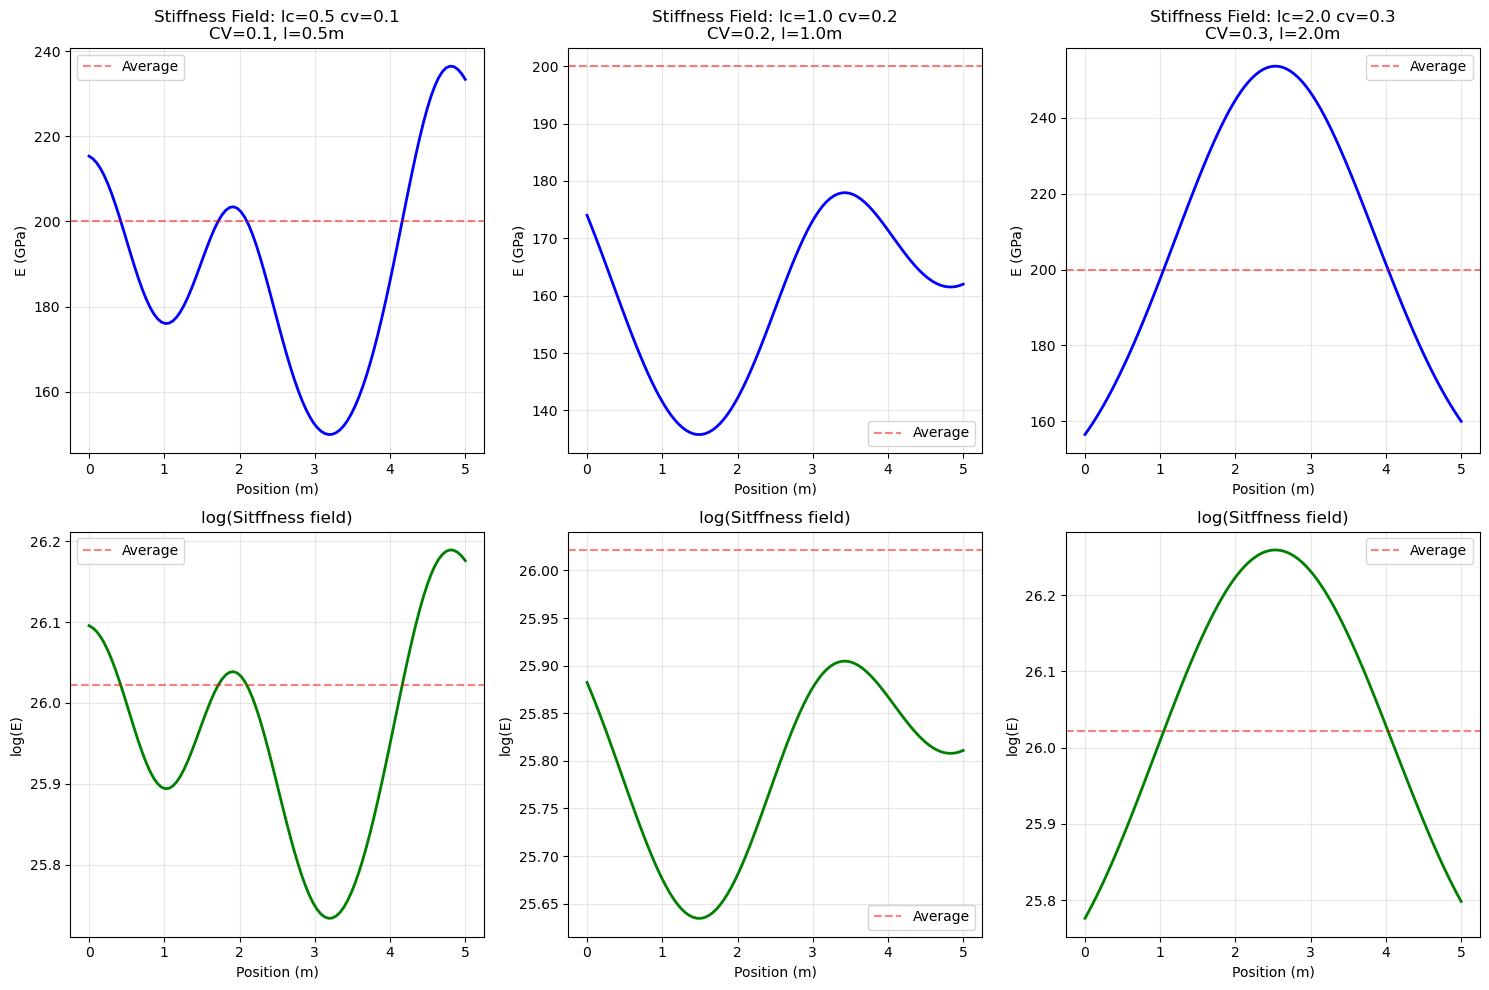
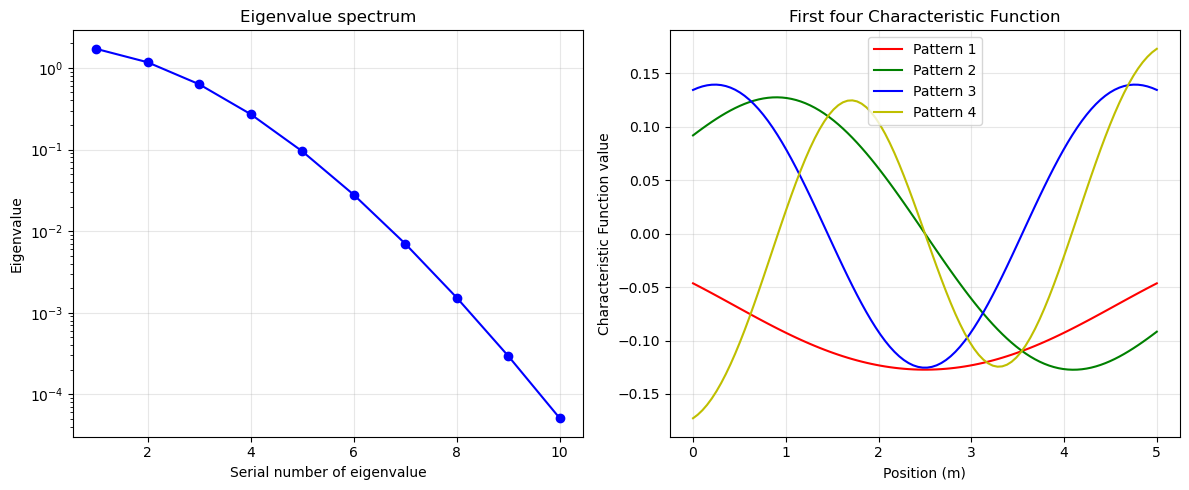
可以观察到：
- **特征值随阶数快速衰减，表明随机场具有良好的低秩表示特性**
- **特征函数呈现由低频到高频的多尺度空间结构**
- **刚度场在保持物理合理性的同时，其统计特性与理论设定高度一致** \
上述结果表明，所构建的 KL 展开随机刚度场生成器在数值实现与统计意义上均是正确且稳健的，能够作为后续结构不确定性分析与贝叶斯推断的可靠基础。

### **5.6 本章小结**
本章成功构建了一个基于KL展开的、与有限元离散节点直接融合的随机刚度场生成器。其核心在于：
- **物理合理性**：通过对数正态分布保证了刚度值的正定性。
- **实现一致性**：在有限元离散点上直接执行KL展开，实现了随机场理论与数值方法的无缝衔接，生成的刚度场向量可直接赋值给FEM模型中的对应单元。
值得注意的是，KL 展开所提供的是一种**统计意义上的最优表示**，而非保证在模态反演意义下的最优参数化。如何在“统计最优性”与“动力学可辨识性”之间取得平衡，是后续研究中可以重点探讨的问题。

---

## **6. 物理启发的参数化刚度突变库建模**
### **6.1 研究动机与本章目标**
第5章构建的KL展开随机场有效地模拟了材料属性的空间连续波动，代表了结构刚度的“背景不确定性”。然而，工程损伤往往表现为局部化、离散化的特征，如连接松动、局部冲击或疲劳裂纹。这些损伤与连续随机波动在物理成因、空间尺度和对结构性能的影响上存在本质区别。\
为建立更贴近工程实际的反问题研究平台，必须在随机背景场上叠加具有明确物理意义的局部刚度突变。本章的目标是：构建一个模块化、可扩展、参数化的“刚度突变库” ，以统一、灵活的方式生成各类典型工程损伤的数学模型，并将其与KL随机场无缝耦合，从而形成“连续随机背景 + 离散确定性突变”的混合非均匀刚度场描述体系。（本章的具体代码详见 /1D_Timoshenko_beam_mutation/ 和 /1D_Timoshenko_beam_data_generator/）
### **6.2 刚度突变的物理含义与建模假设**
我将“突变”定义为：在远小于结构总长的空间尺度内，刚度相对于背景值发生显著、局部的变化。其核心建模假设如下：
- **效应等效假设**：尽管各类损伤（裂纹、腐蚀、连接失效）的详细物理机理不同，但其对结构整体动力特性的影响，可宏观等效为局部区域刚度的折减或异常增加。
- **参数化建模假设**：每种突变类型可通过一组有限的、具有物理意义的参数（如位置、强度、空间影响范围、形状、权重）来刻画。这些参数基于工程经验或典型试验数据设定在一个合理的范围内，并承认其存在假设性。
- **线性叠加假设**：在工程常见的损伤程度下，多个突变之间、以及突变与随机背景场之间的力学效应近似满足线性叠加原理，允许以相乘或相加的方式将它们的刚度修正效应合成到基础场中。
### **6.3 参数化刚度突变库的构建**
为实现模块化和可拓展性，我设计了``` class MutationLibrary ```突变库，它将每种突变类型定义为一个独立的“生成器”，包括以下核心参数维度：
- **突变位置(Position)**：损伤发生的轴向坐标，其可施加工程约束（如“裂纹仅出现在根部”等）。
- **突变幅值(Amplitude)**：定义刚度幅值（变化率） $\alpha\in(-1,1)$，表示损伤的严重程度，如 $\alpha = -0.3$ 表示刚度下降30%。同时，本研究中，$\alpha$ 并非来源于实验标定，而是作为一种结构退化强度的抽象参数，用于构建具有可控难度的数据集。
- **影响区间(Width)**：定义刚度发生显著变化的空间范围，与损伤的物理尺寸相对应。一样地，本研究并不试图精确刻画真实损伤几何，而是通过参数化影响区间来控制突变的空间尺度。
- **形状函数(Shape)**：描述刚度在影响区间内的空间分布形态（如高斯形、阶跃形、双峰形），反映不同的损伤力学特征。
- **权重(Weight)**：考虑到不同损伤在不同环境出现的概率明显不同，本研究同时考虑了权重对于后续数据生成的影响，使得数据更贴近现实中的损伤。
基于上述框架，我们构建了涵盖四大类工程常见损伤的突变库，其具体定义与代码实现完全一致：

| 类别 | 突变名称（代码键名） | 物理背景与特征 | 关键参数范围（振幅、宽度） | 概率权重 | 形状函数 |
|------|---------------------|----------------|---------------------------|----------|----------|
| **连接界面** | 正常连接（joint_normal） | 理想螺栓连接，正常焊接；轻微刚度过渡。 | (±0.10, 0.04~0.06 m) | 0.30 | 高斯对称 |
| | 松动连接（joint_loose） | 螺栓松动，焊缝开裂；刚度显著下降，常表现为不对称。 | (-0.40 - -0.20, 0.10 - 0.25 m) | 0.25 | 非对称高斯 |
| | 过紧连接（joint_over_tight） | 螺栓过拧，预应力效应；刚度局部异常上升。 | (+0.20 - +0.30, 0.10 - 0.25 m) | 0.15 | 陡峭高斯 |
| | 错位连接（joint_misaligned） | 安装错位，偏心连接；刚度先升后降的波动。 | [±0.05, ±0.15], 0.20 - 0.30 m | 0.10 | 双峰分布 |
| **外部损伤** | 过载损伤（overload_damage） | 超载引起的塑性屈服；大范围刚度折减。 | (-0.25 - -0.15, 0.30 - 1.00 m) | 0.20 | 平台状 |
| | 划痕/刮伤（scratch_damage） | 工具刮擦；浅层、线状损伤。 | (-0.20 - -0.10, 长度: 0.10 - 0.80 m) | 0.15 | 线性衰减 |
| | 冲击凹陷（impact_dent） | 物体撞击；局部凹陷，中心刚度下降大。 | (-0.50 ~ -0.20, 直径: 0.05 - 0.15 m) | 0.10 | 冲击波形 |
| **腐蚀磨损** | 均匀腐蚀（uniform_corrosion） | 电化学腐蚀；大面积较均匀退化。 | (-0.30 - -0.10, 0.50 - 2.00 m) | 0.10 | 均匀 |
| **裂缝损伤** | 发丝裂缝（hairline_crack） | 疲劳初期微裂纹；极窄、陡峭的刚度下降。 | (-0.15 - -0.05, 0.002 - 0.005 m) | 0.08 | 陡峭阶跃 |
| | 表面裂缝（surface_crack） | 腐蚀疲劳裂纹；单侧开放，渐进式下降。 | (-0.20 - -0.10, 0.01 - 0.03 m) | 0.07 | 指数衰减 |
| | 疲劳裂纹群（fatigue_crack_cluster） | 高周疲劳；根部聚集的多个微裂纹。 | (整体: -0.30 - -0.20, 0.10 - 0.30 m) | 0.05 | 集群叠加 |

上述库中突变位置、幅值与影响范围的取值，主要基于工程经验与数值稳定性考虑进行设定。目前这些参数仍被视为“已知”，而**如何从有限模态信息中反演或学习这些参数，是一个尚未解决的问题**。\
不过，值得一提的是，该库作为一个独立的模块，允许后续的研究者轻松的：
- 替换现有突变的数学描述，使其表述更贴合现实物理数据
- 扩展新的突变类型（仅需增加一个新的生成函数即可）
- 调整概率权重以模拟不同的环境
### **6.4 随机背景场与刚度突变的耦合**
为生成一个完整的、包含背景不确定性与局部损伤的刚度场样本，我们通过 ```class EnhancedStiffnessFieldGenerator``` 实现，具体流程如下：
- **生成背景场**：调用第5章的KL展开模块，生成一个对数正态分布的连续随机刚度场 $E_{base}(x)$
- **生成突变集**：从 MutationLibrary 中，依据概率权重随机选取若干突变类型，并在考虑工程约束（如连接处最小间距≥1.5m、确保根部存在连接，至少三个连接处）的前提下，随机生成其具体参数，形成一个突变列表。
- **线性叠加合成**：对于每一个突变，根据其位置、形状和幅值，计算其在单元中心点上的刚度修正因子 $1+\delta_{i}(x)$ 。将基础场与所有突变的修正因子按元素相乘，得到最终刚度场 $E_{final}(x)$ 。

### **6.5 数据集生成**
基于前文构建的“物理引擎”（FEM求解器）、“背景不确定性模型”（KL随机场）及“局部损伤模型”（物理突变库），本节阐述如何将这些模块集成为一个自动化、可扩展的数据生成管线。该管线旨在生成大规模、多样化且物理意义明确的 （模态观测， 刚度场/损伤标签） 配对数据集，为后续数据驱动的损伤识别模型提供训练与验证基础。所以本数据集更适合理解为一个**受控的数值实验平台**，用于测试不同反演策略在噪声、非线性与参数耦合条件下的表现，而非直接对应某一具体工程实例。
#### **6.5.1 单样本生成流程**
每个数据样本的生成是一个确定的、可重复的流程，由函数```def generate_training_sample```控制实现，具体流程如下：
- **生成随机刚度场**：调用```EnhancedStiffnessFieldGenerator.generate_with_random_mutations()```，具体执行流程见上文（6.4），此外这里会记录突变区域掩码```mutation_mask``` 为后续生成损伤标签做准备。
- **正问题求解**：将 $E_{final}(x)$ 和 $G_{final}(x)$ 作为每个单元的弹性模量和剪切模量输入至FEM器中(```def modal_analysis_with_mode_shapes```)，求解前5阶模态的固有频率和振型。
- **仿真观测数据处理**：为模拟实际实验中的测量环节，对理想的仿真模态数据进行处理
  - **振型插值与归一化**：通过 ``` def process_mode_shapes_for_nn()``` 将不同样本的振型（节点数随网格划分可能变化）线性插值到一组固定的空间坐标点（如50个点），形成固定维度的输入。随后进行振型归一化，使其最大绝对值为1，以消除幅值尺度的影响。
  - **添加测量噪声**：通过 ``` def add_measurement_noise()``` 引入模拟噪声。频率添加相对高斯噪声（如1%标准差），振型添加具有空间相关性的绝对高斯噪声（如2%标准差），以更真实地模拟传感器误差与环境干扰。
- **标签构造**：基于生成的刚度场与突变信息，构建供神经网络学习的监督信号
  - **刚度场标签**：将 $E_{final}(x)$ 插值到与振型相同的固定空间点，得到连续的刚度分布向量 $E_{label}\in R^{50}$。
  - **损伤分类标签**：提供两种不同的分类标签：
    - **二值标签**：
      - **基于突变区域掩码的二值标签**：直接标识出由 MutationLibrary 生成的、参数化的“工程突变”所直接影响的空间区域。它对应的是我主动植入的、离散的损伤事件。
      - **基于刚度阈值的二值标签**：从“薄弱环节识别”的核心目标出发，将整体刚度场中相对薄弱（ <30% ）的区域定义为损伤。这更符合工程中通过刚度下降判断“弱区”的直觉，可能捕捉到突变掩码之外的、由随机场波动引起的隐性薄弱点。
    - **多类别损伤标签**：通过```def create_multi_class_labels```创建多类别损伤标签，在定位损伤的基础上，进一步区分其物理类型（如连接问题、外部损伤、腐蚀、裂缝）。
  - **元数据封装**：每个样本的所有生成参数（随机种子、突变类型与位置、噪声水平等）均作为```metadata```保存，确保了数据的完全可追溯性，为后续的模型诊断、误差分析和物理解释提供了关键信息。
#### **6.5.2 数据集生成流程**
函数```def generate_dataset``` 实现了数据集的批量化与并行化生成。通过指定总样本数、批次大小和输出目录，该函数能自动管理生成过程，确保样本的多样性（通过不同的随机种子），并高效地存储为分块文件（ .pkl 格式）。这支持了生成超大规模数据集（例如数万至数十万样本）以训练复杂深度学习模型的需求。
#### **6.5.3 设计优势总结**
本数据生成流程的设计具有以下优势，使其成为研究“不确定性下结构损伤反问题”的理想基准平台：
- **物理一致性**：数据源于经过严格验证的物理模型，输入与输出间存在真实的力学因果关系，避免了纯随机生成数据可能存在的物理矛盾。
- **工程真实性**：通过融合连续随机波动与离散参数化损伤，同时考虑了材料本征不确定性与典型工程缺陷，比单一损伤模式或均匀刚度假设更贴近实际。
- **可控性与可重复性**：所有随机性均由随机种子控制，任何样本均可精确复现，便于科研中的消融实验与公平比较。
- **任务灵活性**：提供回归（刚度场）、二分类（损伤检测）、多分类（损伤类型识别）等多种标签，可支持不同研究目标的算法训练。

### **6.6 本章小结**
综上，本章构建了一套从“随机基准刚度场”到“含突变非均匀刚度场”的系统生成流程，为薄弱环节识别问题提供了结构化的数据基础。然而，目前该框架仍属于正向生成模型，其在反问题中的可辨识性、最优参数化形式及对噪声的鲁棒性仍有待深入研究。这些问题为引入基于物理约束的优化方法或数据驱动方法提供了明确的研究动机。\
故而，在第7章中，将基于此系统生成的数据集，初步探索如何利用神经网络来学习从模态观测到刚度场或损伤标签的反演映射，并讨论其面临的挑战与启示。

---

## **第7章 讨论、局限性与未来方向**
### **7.1 研究路径的迭代**
本章旨在超越对单一模型性能的讨论，转而复盘并分析整个研究探索的迭代过程。本研究始于一个**核心的工程约束**：在实际结构健康监测中，可稳定获取的观测数据通常是**低阶的固有频率**和**有限测点的振型**。因此，我认为将损伤识别建模为一个从这些模态数据到空间损伤位置的监督分类问题，是一个直观且工程上可落地的起点。
#### **7.1.1 FCN网络**
基于此，我们首先选择了结构最简单的**全连接网络作为基线模型（FCN）**。当然要在此说明的是，这一选择并非出于模型复杂度的偏好，而是希望通过最弱假设的网络结构，检验模态信息本身是否蕴含可辨识的损伤特征。在中等规模数据集（约1万样本）上的实验取得了约82%的准确率，这一初步成功验证了从模态数据中学习损伤模式的基本可行性，下图展现了中等模型的学习路径。（代码见 /1DFCN_medium_training/ 和 /1DFCN_full_training/）
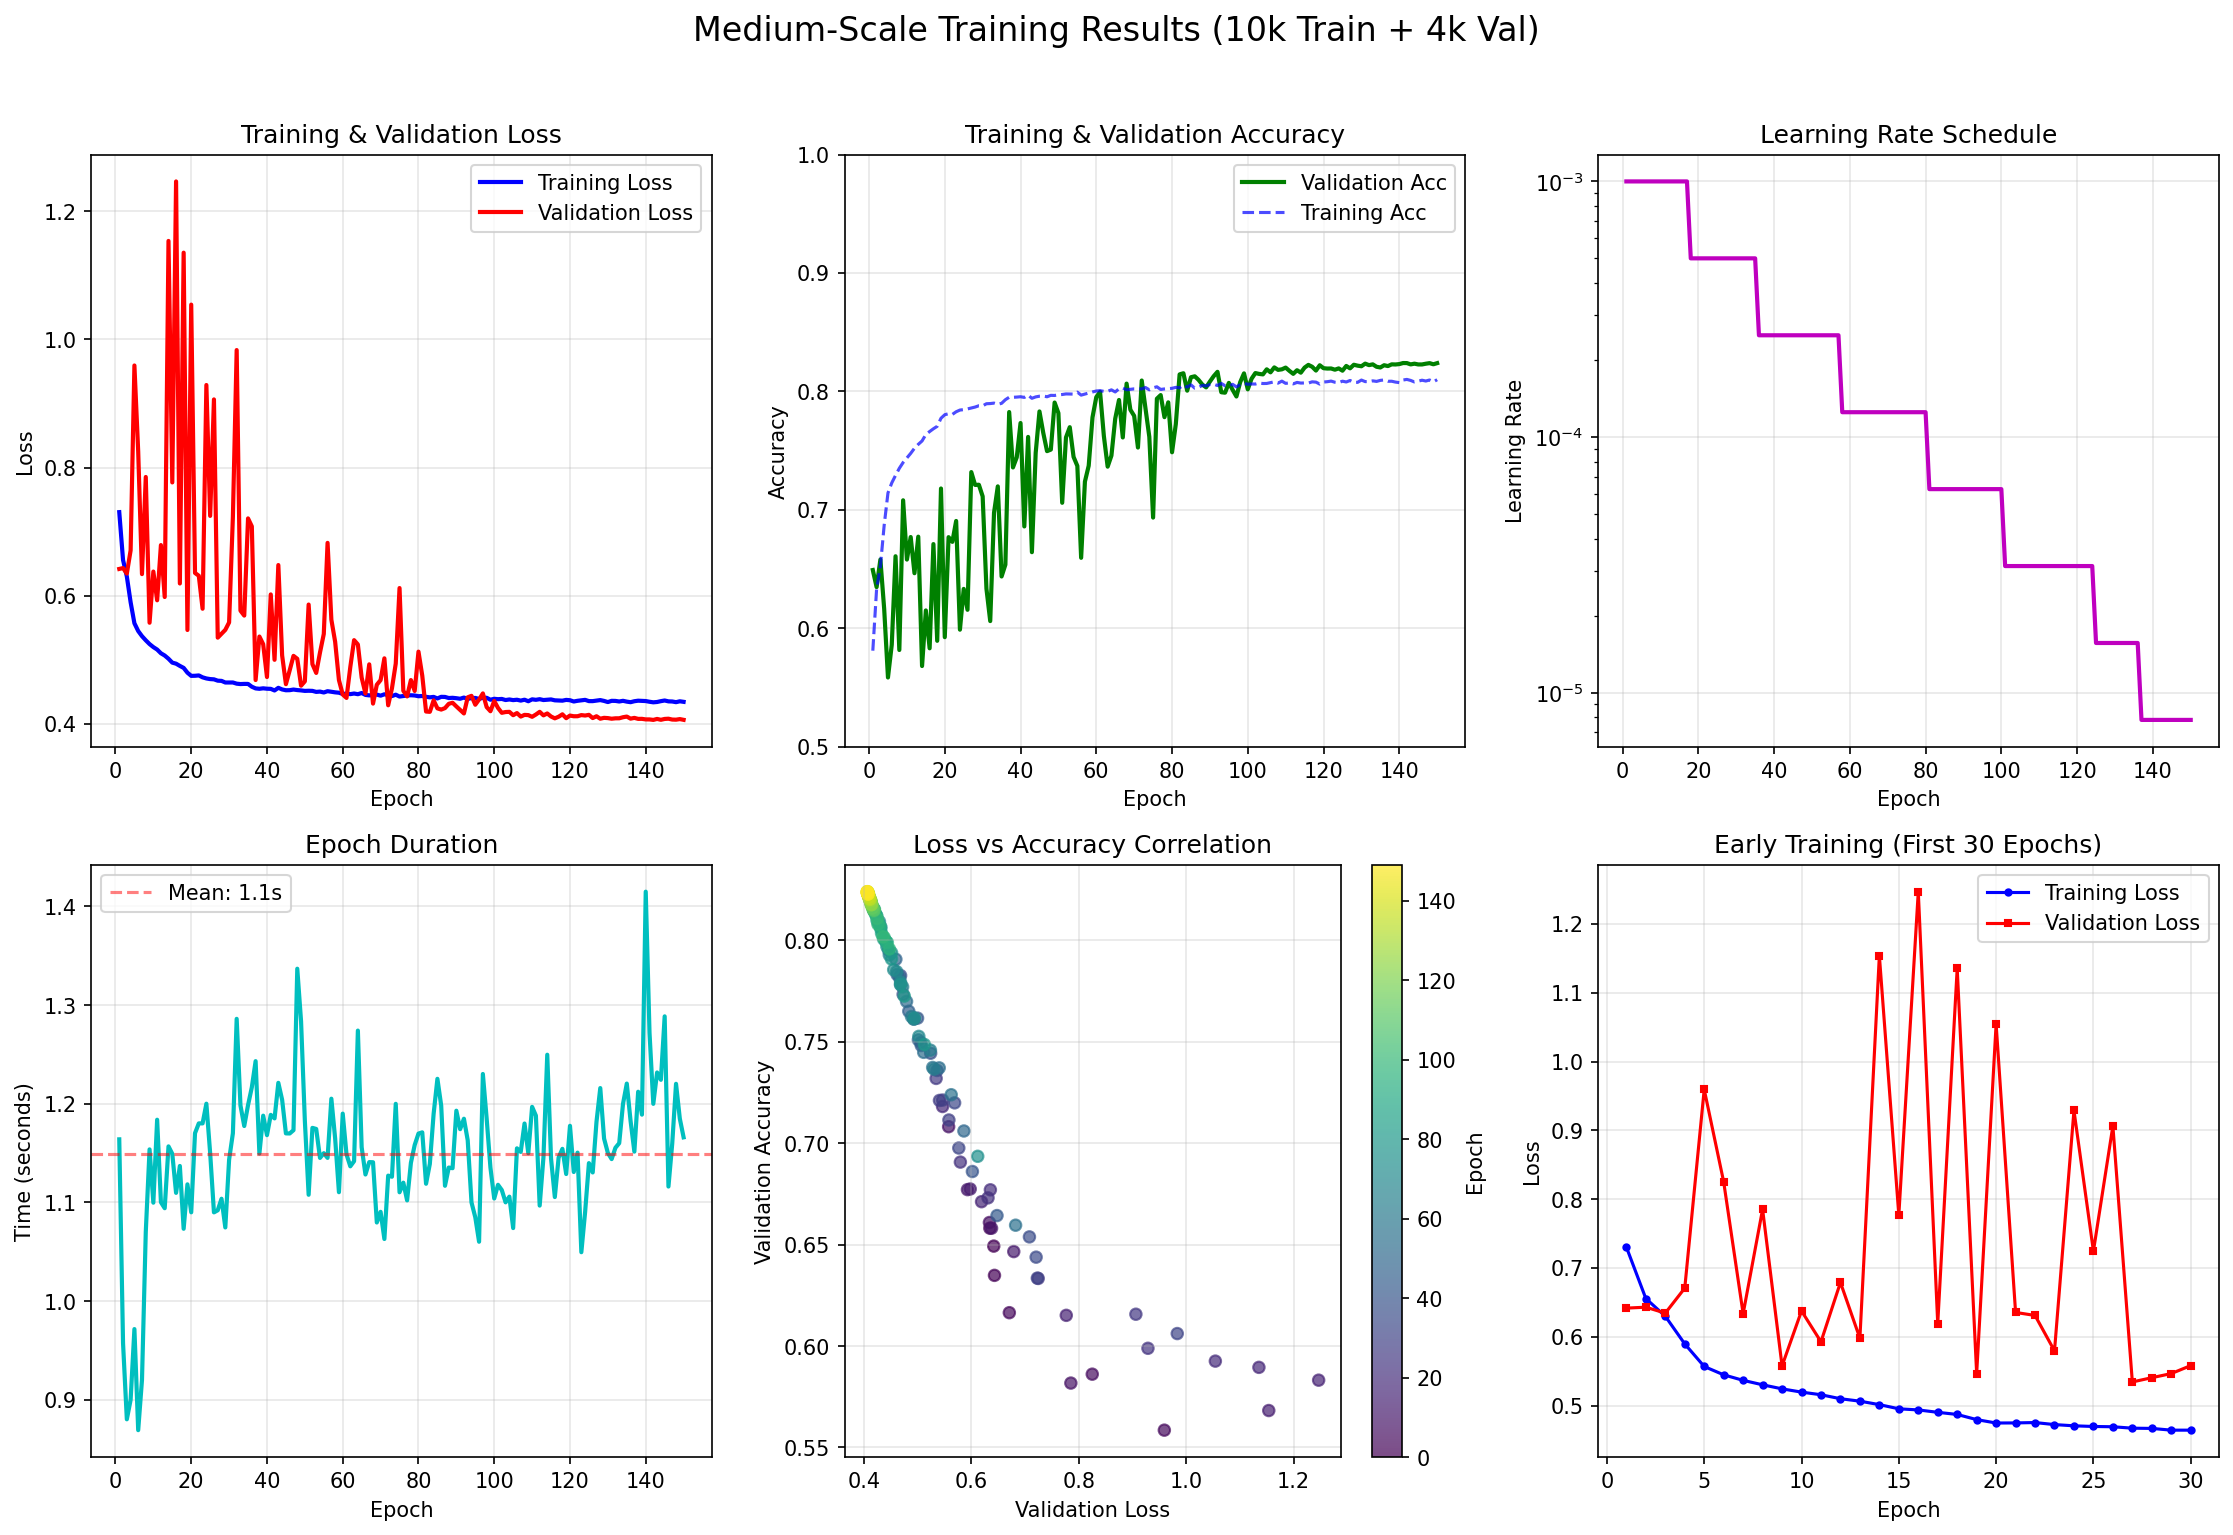
然而，这一“成功”潜藏着危机，该结果并**不代表模型学到了有效的损伤判据，而更可能是对数据先验分布的利用**。当在完整数据集（约9万样本）上评估时，FCN的性能显著下降至约65%-68%。这一反差促使我们进行深度诊断。分析发现，FCN在训练中迅速收敛于一个“捷径策略”：由于数据中健康区域（标签0）占绝大多数（通常>85%），FCN倾向于忽略稀疏的损伤特征，转而学习“永远预测健康”的简单规则。在小数据集中，这一策略因过拟合而看似有效，但在大数据集的复杂性面前，其泛化能力薄弱的本质便暴露无遗。

#### **7.1.2 1DCNN网络**
这一发现促使我们转向一维卷积神经网络。CNN的归纳偏置——对局部空间模式敏感——与“损伤是局部刚度异常”的物理直觉隐式契合。实验结果验证了这一点：尽管在中小数据量下起步较慢，但CNN的性能随数据量增加而稳健提升，在完整数据集上达到约79%的准确率，并展现出更合理的训练曲线。同时更重要的是，这一对比实验促使我认识到，模型选择外，还存在更深层次的问题需要进一步理解。（中等训练模型代码/1DCNN_medium_training/，全训练模型代码/1DCNN_full_training/）
下图分别展示了中等数据训练模型和全部训练模型的结果：\
**中等数据训练模型：**
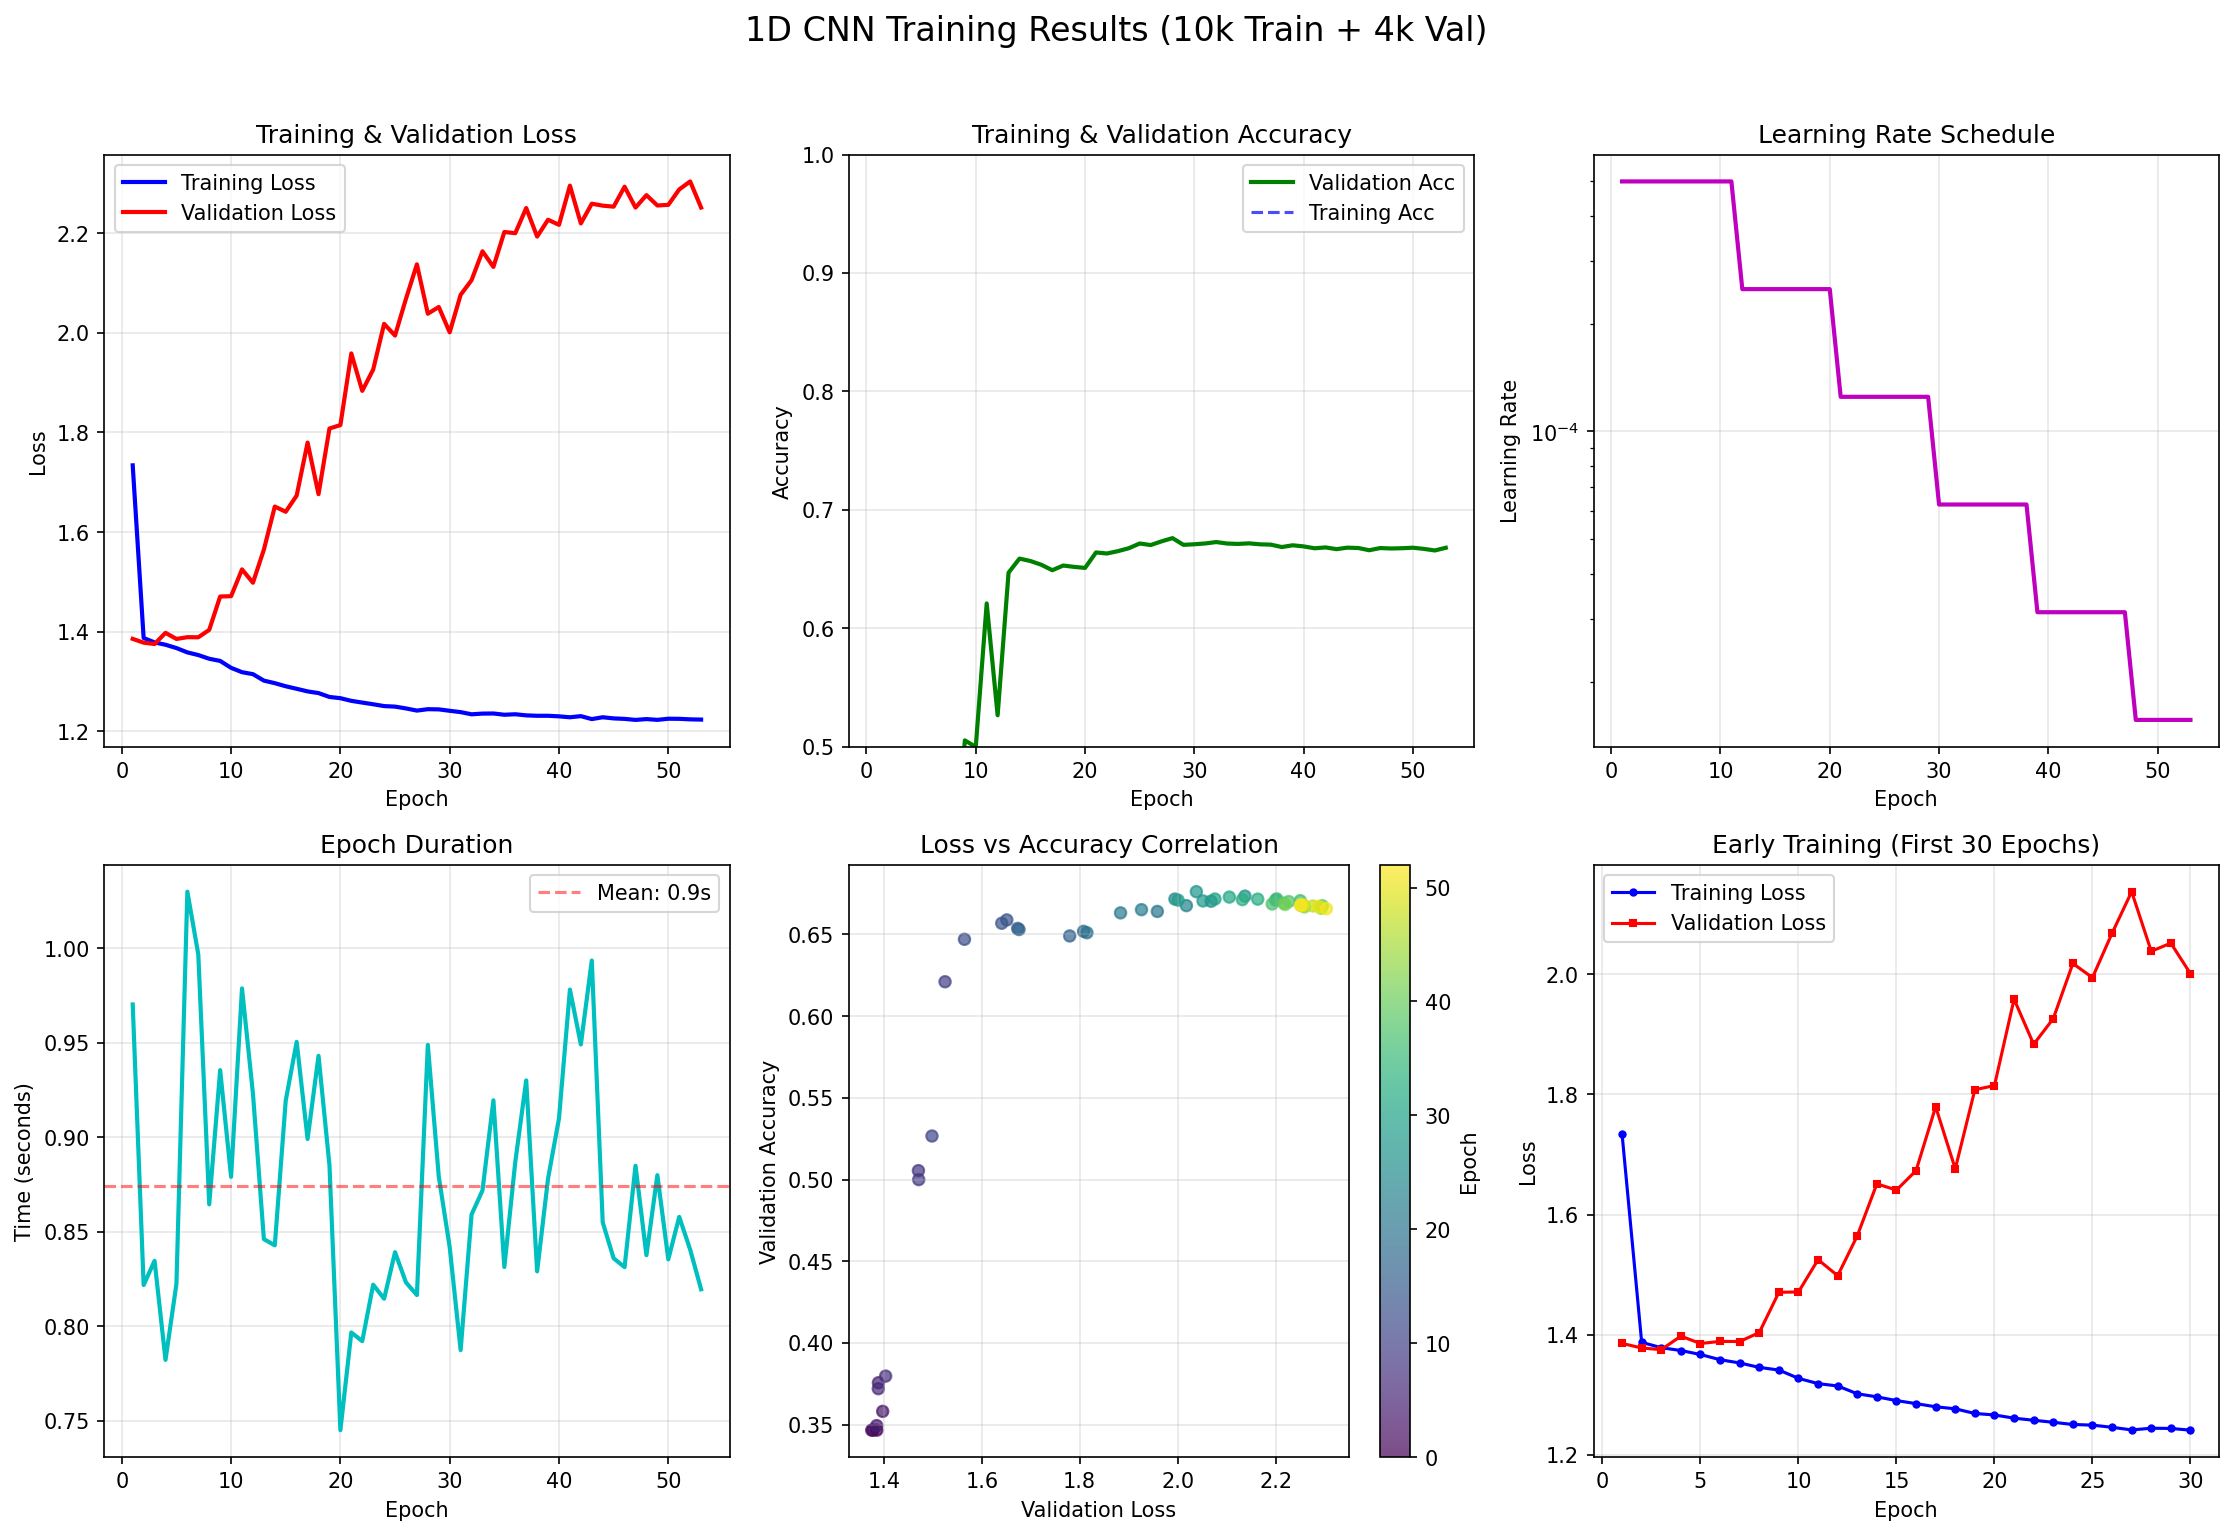
**全数据训练模型：**
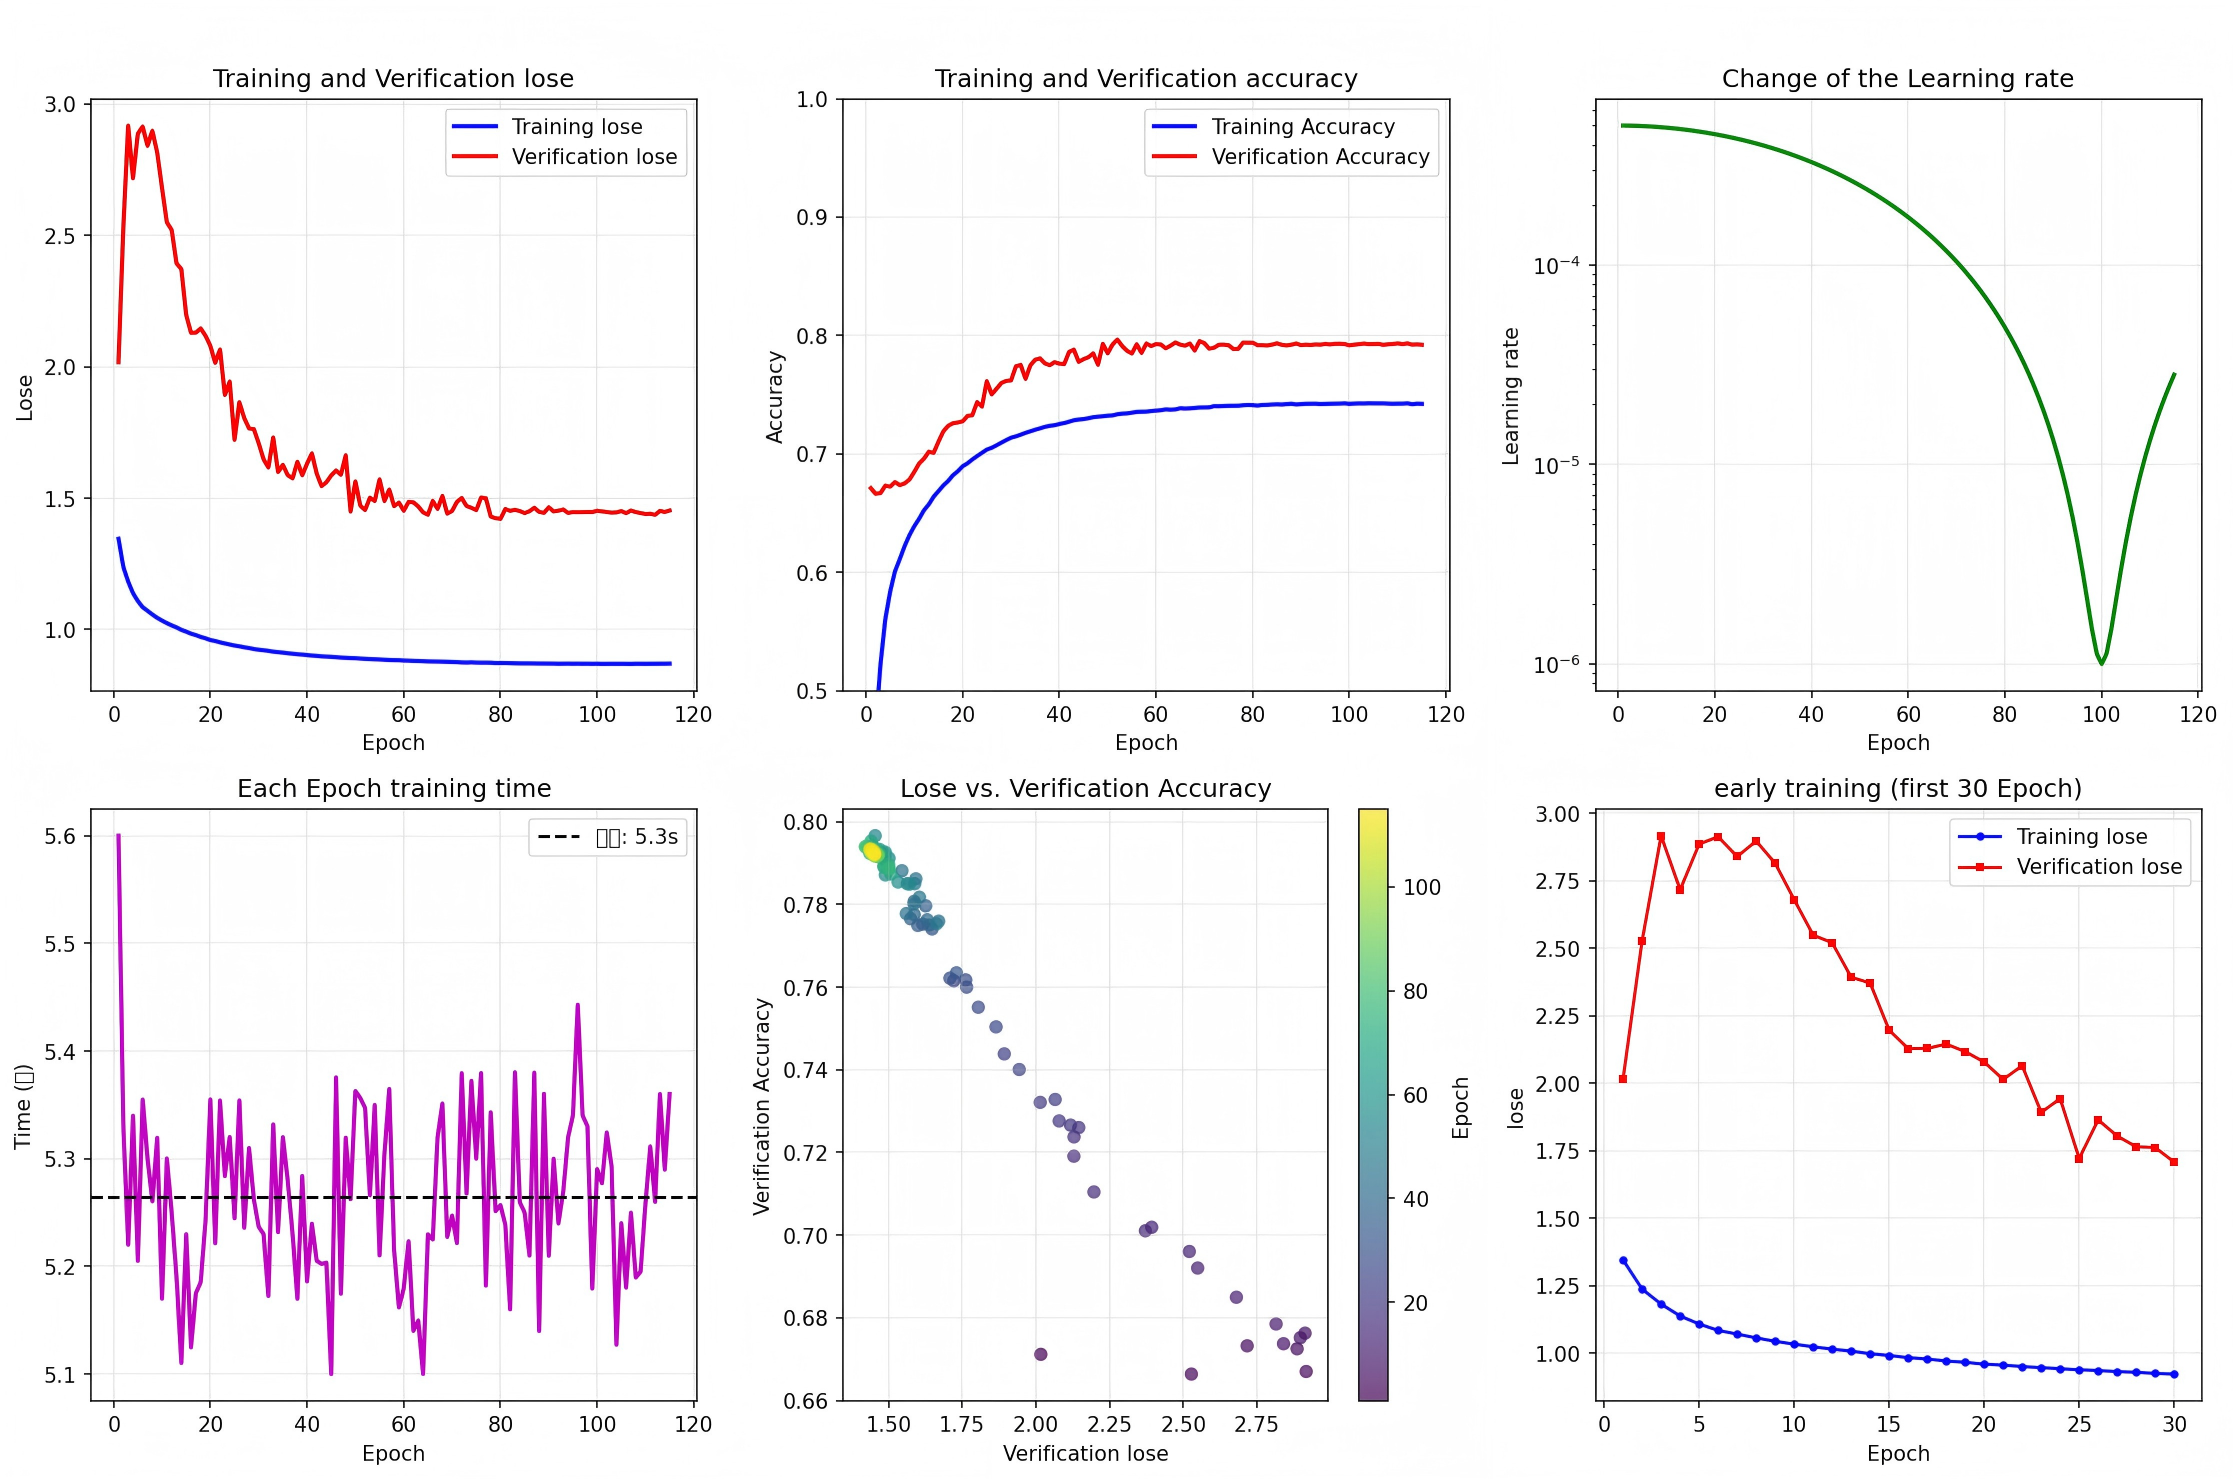
### **7.2 核心挑战**
上述迭代过程将让我进一步思考对于网络选择和训练核心挑战：
#### **7.2.1 工程现实与数据失衡的必然性**
由于从实际工况出发，我的数据集模拟了一个**不可回避的工程现实**：对于任何服役中的实际结构，**严重损伤状态总是只占其生命周期和空间体积的极小部分**。因此，任何基于真实场景的数据集，其损伤样本都必然是稀疏的。本框架生成的**数据极端不平衡（如损伤点占比<10%）**，并非缺陷，而是对物理世界这一基本事实的忠实映射。这迫使任何数据驱动方法都必须首先解决“**从海量正常信号中可靠地检出稀疏异常**”的经典难题。
#### **7.2.2 分类范式所带来的必然问题**
尽管上述分类方法（6.5.1）在工程直观性上具有吸引力，但我们通过实验触及其性能仍然不足。我认为其根本限制在于表述失配：
- **信息损失**：二值分类丢弃了损伤的连续程度信息，而刚度下降30%与下降60%在工程意义上截然不同。
- **决策风险**：在面对噪声和模型误差时，一个没有置信度附着的“硬判决”（有/无损伤）可能带来较高的误判风险，从而降低工程实用性。
现有工作表明，基于分类的识别范式，其效能上限受限于上述物理本质与信息瓶颈，而非仅由模型复杂度决定。
### **7.3 未来方向的思考**
基于以上认识，本研究的价值不仅在于构建了一个可验证的平台，更在于对未来进一步研究的启示。同时，需要指出的是，以下讨论和设想更多基于当前研究阶段的观察与直觉判断，而非成熟方法的系统比较。
#### **7.3.1 方向一：从分类到连续刚度场回归**
直接的演进是回归到问题本源——连续刚度场 $E(x)$ 的反演。
其具备以下优势：
- **根治失衡**：回归损失函数不受类别分布影响。
- **信息完整**：直接输出刚度值，保留损伤程度与形态的全部信息。
然而，最关键的难题是**高维空间到高维空间的直接回归难度极大**，其在计算上显著更为困难，且在现阶段尚未形成稳定可复现的网络结构，但其潜在工程价值足以支撑进一步探索，因其一旦实现效果会奇佳。
#### **7.3.2 方向二：从确定性预测到贝叶斯不确定性量化**
为应对不适定性和量化决策风险，我认为可以引入**不确定性量化**。同时贝叶斯网络**对低级模态数据极其敏感**，与本研究的输入数据不谋而合，故这也是未来的发展方向之一。

---

## **8 总结**
截止目前，本研究完成了一项从物理建模到算法验证的闭环工作，并在此过程中识别出数据驱动方法应用于结构损伤反问题时所面临的若干关键瓶颈。需要指出的是，当前所采用的神经网络模型在数值意义上是成立且可用的，但其性能仍然存在明显不足，这也是我选择将本项目进行开源的重要原因之一：在将个人思考与实现过程系统化整理的同时，借助 GitHub 平台与国内外研究者开展更开放的交流与讨论。\
因此，本工作所构建的基准平台与其说是一个完整的“解决方案”，不如说是一个**启发性起点**。它为我后续的研究指明了两个相互关联的发展方向：其一，是探索更具物理一致性的反演建模方式；其二，是构建能够显式刻画不确定性的智能评估框架。这一过程标志着研究视角从“尝试解决一个具体工程问题”，逐步转向“理解并探索一类方法论问题”，也为我进一步深入研究物理建模与人工智能方法的融合奠定了清晰的路径与实践基础。
